## Introduction

HR departments can utilise machine learning. Here is an opportunity to try predictive analytics in identifying the employees most likely to get promoted.

Variable	Definition

employee_id	Unique ID for employee

department	Department of employee

region	Region of employment (unordered)

education	Education Level

gender	Gender of Employee

recruitment_channel	Channel of recruitment for employee

no_of_trainings	no of other trainings completed in previous year on soft skills, technical skills etc.

age	Age of Employee

previous_year_rating	Employee Rating for the previous year

length_of_service	Length of service in years

KPIs_met >80%	if Percent of KPIs(Key performance Indicators) >80% then 1 else 0

awards_won?	if awards won during previous year then 1 else 0

avg_training_score	Average score in current training evaluations

is_promoted	(Target) Recommended for promotion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train_LZdllcl.csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [5]:
df.describe(include = 'object').T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


In [6]:
for i in df.select_dtypes(include= 'object').columns:
    print(df[i].value_counts())
    print('-------------------------')

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64
-------------------------
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64
---------------

In [7]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
df.isnull().sum()/len(df)*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [9]:
df.duplicated().sum()

0

In [11]:
df['education'] = df.groupby('department')['education'].transform(lambda x: x.fillna(x.mode()[0]))
df['previous_year_rating'] = df.groupby('region')['previous_year_rating'].transform(lambda x: x.fillna(x.mode()[0]))

In [12]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## Univariate Analysis

<Axes: xlabel='count', ylabel='department'>

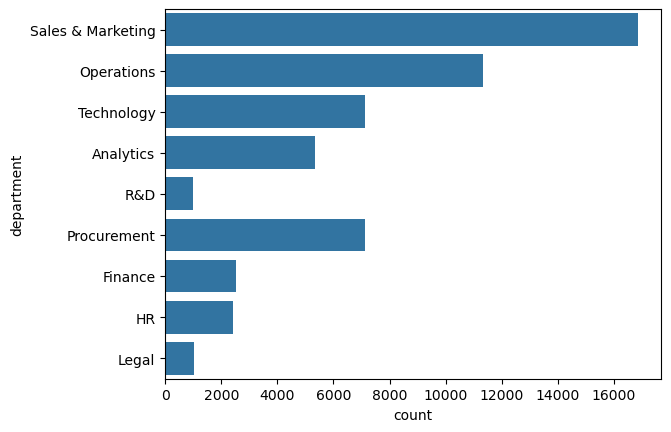

In [15]:
sns.countplot(df['department'])

<Axes: xlabel='count', ylabel='region'>

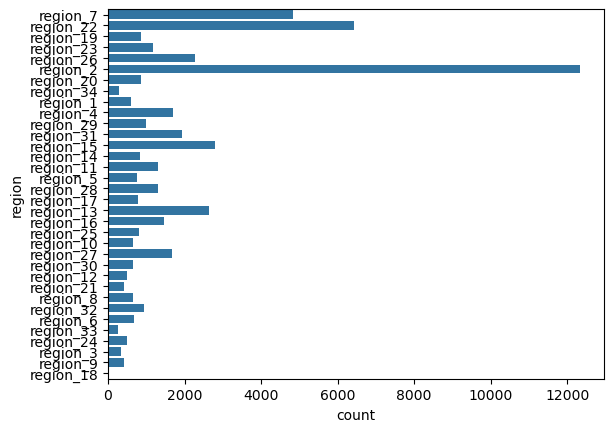

In [16]:
sns.countplot(df['region'])

<Axes: xlabel='count', ylabel='education'>

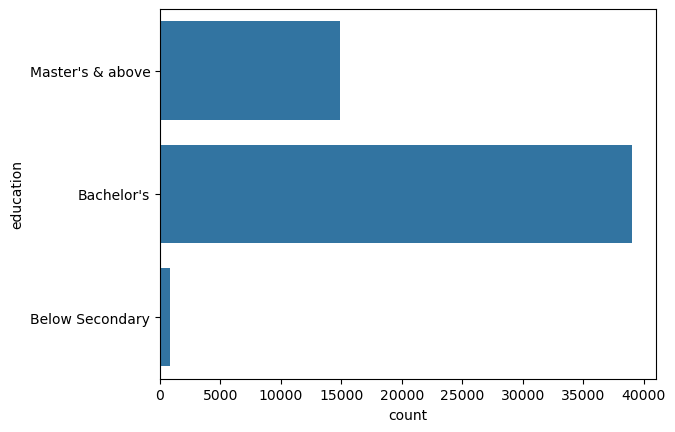

In [17]:
sns.countplot(df['education'])

<Axes: xlabel='count', ylabel='recruitment_channel'>

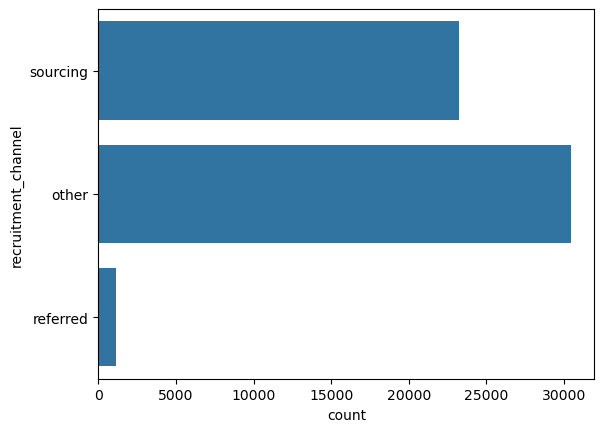

In [18]:
sns.countplot(df['recruitment_channel'])

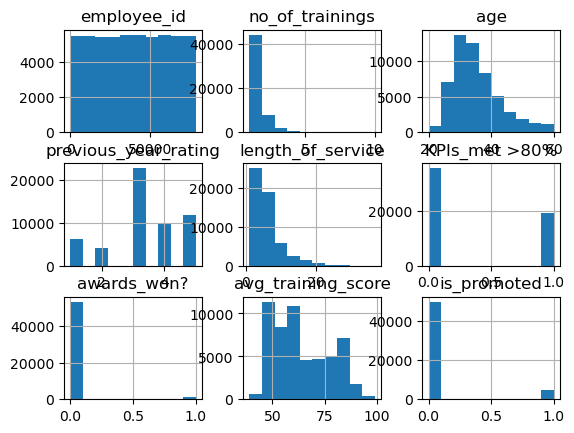

In [19]:
df.hist()
plt.show()

<Axes: >

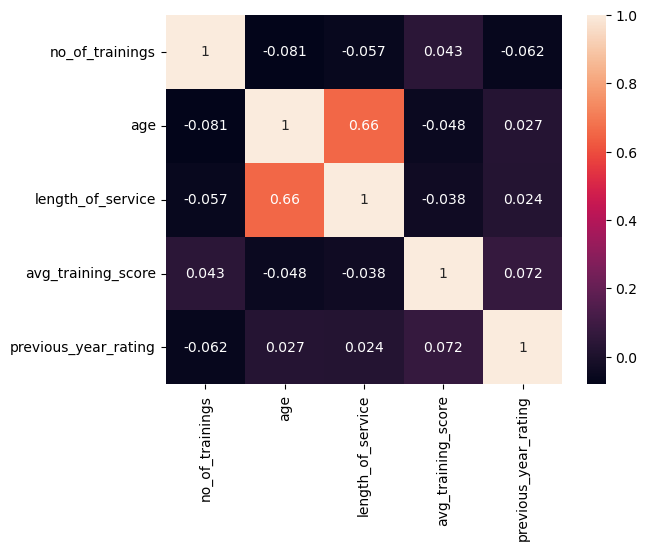

In [23]:
sns.heatmap(df[['no_of_trainings','age','length_of_service','avg_training_score','previous_year_rating']].corr(), annot = True)

In [24]:
df.drop(columns= 'employee_id', inplace= True)

In [25]:
dfg = pd.get_dummies(df, dtype= 'int32', drop_first=True)

In [26]:
dfg

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,48,3.0,17,0,0,78,0,0,0,...,0,0,0,0,0,0,0,1,0,1
54804,1,37,2.0,6,0,0,56,0,0,0,...,0,0,0,0,0,0,1,0,0,0
54805,1,27,5.0,3,1,0,79,0,0,0,...,0,0,0,0,0,0,0,1,0,0
54806,1,29,1.0,2,0,0,45,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [27]:
x = dfg.drop(columns= 'is_promoted')
y = dfg['is_promoted']

In [40]:
y.value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size= 0.8, stratify= y, random_state= 7)

In [41]:
from sklearn.linear_model import LogisticRegression
lt = LogisticRegression(class_weight = 'balanced', n_jobs= -1)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs= -1)
from sklearn.naive_bayes import GaussianNB, MultinomialNB
gnb = GaussianNB()
mnb = MultinomialNB()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight = 'balanced')
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight = 'balanced', n_jobs= -1)
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(n_jobs= -1)
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs= -1)
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
from sklearn.ensemble import HistGradientBoostingClassifier
hist = HistGradientBoostingClassifier(class_weight = 'balanced')
from sklearn.metrics import classification_report, confusion_matrix
li = [lt,knn,gnb,mnb,dt,rf,ada,bg,et,gb,hist]

In [43]:
def model_validation(model, xtrain, ytrain, xtest, ytest):
    m = model
    m.fit(xtrain, ytrain)
    pred = m.predict(xtest)
    print(model)
    print('Confusion Matrix\n', confusion_matrix(ytest, pred))
    print('Classification Report\n', classification_report(ytest, pred))

In [44]:
for model in li:
    model_validation(model, xtrain, ytrain, xtest, ytest)

LogisticRegression(class_weight='balanced', n_jobs=-1)
Confusion Matrix
 [[7397 2631]
 [ 247  687]]
Classification Report
               precision    recall  f1-score   support

           0       0.97      0.74      0.84     10028
           1       0.21      0.74      0.32       934

    accuracy                           0.74     10962
   macro avg       0.59      0.74      0.58     10962
weighted avg       0.90      0.74      0.79     10962

KNeighborsClassifier(n_jobs=-1)
Confusion Matrix
 [[9974   54]
 [ 807  127]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     10028
           1       0.70      0.14      0.23       934

    accuracy                           0.92     10962
   macro avg       0.81      0.57      0.59     10962
weighted avg       0.91      0.92      0.90     10962

GaussianNB()
Confusion Matrix
 [[4906 5122]
 [ 228  706]]
Classification Report
               precision    recall  f1-scor

C:\Users\mirza\ana3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()
Confusion Matrix
 [[9982   46]
 [ 783  151]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     10028
           1       0.77      0.16      0.27       934

    accuracy                           0.92     10962
   macro avg       0.85      0.58      0.61     10962
weighted avg       0.91      0.92      0.90     10962

BaggingClassifier(n_jobs=-1)
Confusion Matrix
 [[9877  151]
 [ 599  335]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     10028
           1       0.69      0.36      0.47       934

    accuracy                           0.93     10962
   macro avg       0.82      0.67      0.72     10962
weighted avg       0.92      0.93      0.92     10962

ExtraTreesClassifier(n_jobs=-1)
Confusion Matrix
 [[9859  169]
 [ 642  292]]
Classification Report
               precision    recall  f1-score   support

     

In [ ]:
# Bagging is the performing model

In [ ]:
# Oversampling models

In [50]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

In [51]:
for model in li:
    model_validation(model, X_resampled, y_resampled, xtest, ytest)

LogisticRegression(class_weight='balanced', n_jobs=-1)
Confusion Matrix
 [[8415 1613]
 [ 562  372]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.84      0.89     10028
           1       0.19      0.40      0.25       934

    accuracy                           0.80     10962
   macro avg       0.56      0.62      0.57     10962
weighted avg       0.87      0.80      0.83     10962

KNeighborsClassifier(n_jobs=-1)
Confusion Matrix
 [[7571 2457]
 [ 410  524]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.75      0.84     10028
           1       0.18      0.56      0.27       934

    accuracy                           0.74     10962
   macro avg       0.56      0.66      0.55     10962
weighted avg       0.88      0.74      0.79     10962

GaussianNB()
Confusion Matrix
 [[5458 4570]
 [ 446  488]]
Classification Report
               precision    recall  f1-scor

C:\Users\mirza\ana3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()
Confusion Matrix
 [[8743 1285]
 [ 573  361]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.87      0.90     10028
           1       0.22      0.39      0.28       934

    accuracy                           0.83     10962
   macro avg       0.58      0.63      0.59     10962
weighted avg       0.88      0.83      0.85     10962

BaggingClassifier(n_jobs=-1)
Confusion Matrix
 [[9645  383]
 [ 592  342]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     10028
           1       0.47      0.37      0.41       934

    accuracy                           0.91     10962
   macro avg       0.71      0.66      0.68     10962
weighted avg       0.90      0.91      0.91     10962

ExtraTreesClassifier(n_jobs=-1)
Confusion Matrix
 [[9645  383]
 [ 655  279]]
Classification Report
               precision    recall  f1-score   support

     

In [57]:
test = pd.read_csv('test_2umaH9m.csv')
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [31]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [32]:
test['education'] = test.groupby('department')['education'].transform(lambda x: x.fillna(x.mode()[0]))
test['previous_year_rating'] = test.groupby('region')['previous_year_rating'].transform(lambda x: x.fillna(x.mode()[0]))

In [33]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [35]:
test.drop(columns= 'employee_id', inplace= True)

In [36]:
testg = pd.get_dummies(test, drop_first= True, dtype= 'int')
testg

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,24,3.0,1,1,0,77,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,31,3.0,5,0,0,51,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,31,1.0,4,0,0,47,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,31,2.0,9,0,0,65,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,30,4.0,7,0,0,61,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,1,24,3.0,1,0,0,61,0,0,1,...,0,0,0,0,0,1,0,1,0,1
23486,1,31,3.0,7,0,0,74,0,0,0,...,0,0,0,0,0,0,0,1,0,1
23487,1,26,4.0,4,0,0,50,0,1,0,...,0,0,0,0,0,0,0,0,0,1
23488,3,27,3.0,1,0,0,70,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [55]:
m = BaggingClassifier(n_jobs=-1)
m.fit(x, y)
pred = m.predict(testg)

In [58]:
sub = pd.DataFrame(pred, index = test['employee_id'])

In [59]:
sub.rename(columns={0:"is_promoted"},inplace = True)
sub.to_csv("sub3.csv")